<a href="https://colab.research.google.com/github/GonzalezJulianBautista/Data-Science-Portfolio/blob/main/IMPLEMENTACIONES_DE_MACHINE_LEARNING_(PYTHON).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IMPLEMENTACIONES DE MACHINE LEARNING (PYTHON) - Utilización de librería SciKitLearn - Julián Bautista González**

**Contenido:**

* Regresiones Lineales
* Carga de datos 
* Interpretación de datos
* Análisis exploratorio: 
  * Sección 1: Comparaciones Iniciales
  * Sección 2: Utilizando el pairplot de Seaborn
* Regresión Lineal: Utilizando el modelo de SciKit Learn
* Conclusiones




## **REGRESIONES LINEALES**

Para el proyecto de regresiones lineales, se utilizará un dataset perteneciente a un sitio ficticio de E-commerce. El mismo se extraerá de un [Repositorio Github](https://github.com/GonzalezJulianBautista/Data-Science-Portfolio/tree/main/DATA) en donde se encuentran todos los datasets a utilizar en este notebook de trabajo. 

El objetivo será generar un modelo de regresión lineal que proporcione coeficientes que nos permitan arrivar a conclusiones que agreguen valor a los datos. 

Al tratarse de un sitio de E-commerce, el trabajo se hará en torno al objetivo de maximizar el gasto anual del usuario. 



### **Carga de datos**

Importamos las librerías a utilizar y extraemos los datos del repositorio GitHub.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={'axes.facecolor':'darkgray', 'figure.facecolor':'lightgrey'})
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/GonzalezJulianBautista/Data-Science-Portfolio/main/DATA/Ecommerce%20Customers")

* df: DataFrame que contiene información de los clientes de una tienda de E-commerce. 

### **Interpretación de datos**

Realizamos una interpretación de los datos y las transformaciones convenientes para el trabajo. 

Consultamos con el método .info un primer pantallazo del dataset. Vemos que contamos con 500 entradas en 8 columnas. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Revisamos con el método .head() cómo se ve nuestro DataFrame

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Podemos describir las variables de nuestro dataframe como: 

* Email: casilla de email del usuario, objeto. 
* Address: dirección del usuario, objeto.
* Avatar: avatar del usuario, objeto.
* Avg. Session Lenght: tiempo promedio de sesión del usuario, flotante.
* Time on App: tiempo en aplicación del usuario, flotante.
* Time on Website: tiempo en el sitio web del usuario, flotante.
* Length of Membership: antigüedad de membresía del usuario, flotante.
* Yearly Amount Spent: gasto anual del usuario, flotante.


El método .describe() nos proporciona unos rápidos insights sobre indicadores estadísticos para considerar antes de comenzar el análisis. 

In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Por último, para las transformaciones, ya que el análisis va a ser estadístico utilizando modelos de SciKit Learn, sería bueno retirar las variables que no son numéricas. Esto va a hacer más eficiente el tiempo de procesamiento. 

In [6]:
df.drop(['Email', 'Address', 'Avatar'], axis = 'columns', inplace=True)

In [7]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


El dataframe está listo para su análisis. 

### **Análisis exploratorio**

Una vez listo el dataframe, exploramos los datos. 

#### SECCIÓN 1: Comparaciones Iniciales

Al tratarse de los datos numéricos de una tienda de E-commerce, lo mejor que podemos hacer antes de iniciar la preparación de nuestro modelo de Machine Learning es visualizar las variables puestas una contra otra. 

Para este segmento, los jointplots de Seaborn nos serán de gran ayuda. 

##### Tiempo en el sitio web vs. Gasto anual del usuario

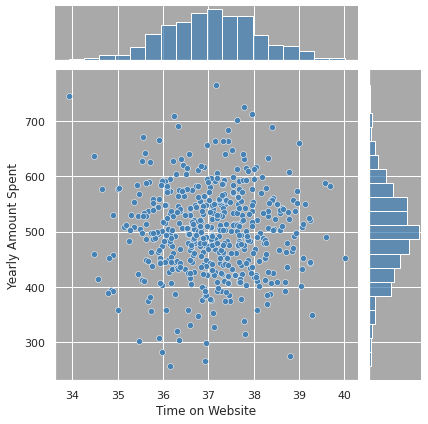

In [42]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df, color = 'steelblue' )

No se puede observar, a simple vista, que una mayor cantidad de tiempo en el sitio web implique un mayor gasto anual. 

##### Tiempo en app vs. Gasto anual del usuario

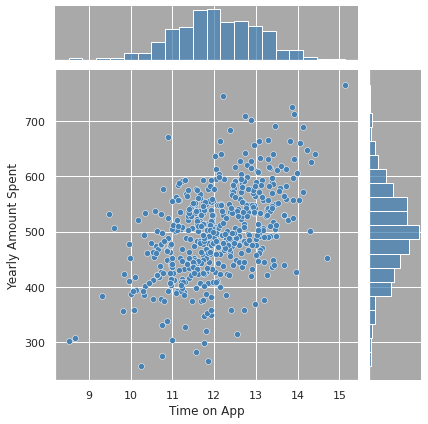

In [43]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df, color='steelblue')

El tiempo en la aplicación presenta más correlación con el gasto anual del usuario. 

##### Antigüedad de membresía vs. Tiempo en app

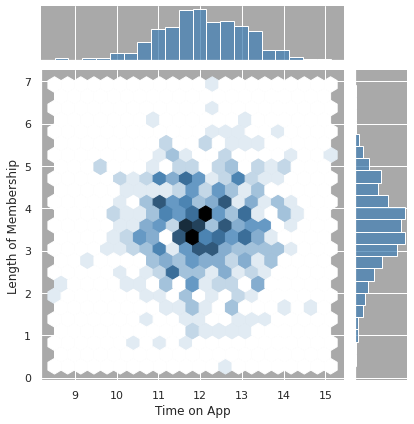

In [31]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=df, color = 'steelblue')

No parece haber una correlación muy fuerte entre la antigüedad de la membresía y el tiempo en la app. 

#### SECCIÓN 2: Utilizando el pairplot de Seaborn

El pairplot de seaborn es una herramienta que nos permitirá encontrar las variables que más correlación presentan una con otra. 

Sobre esa correlación encontrada continuaremos el trabajo. 

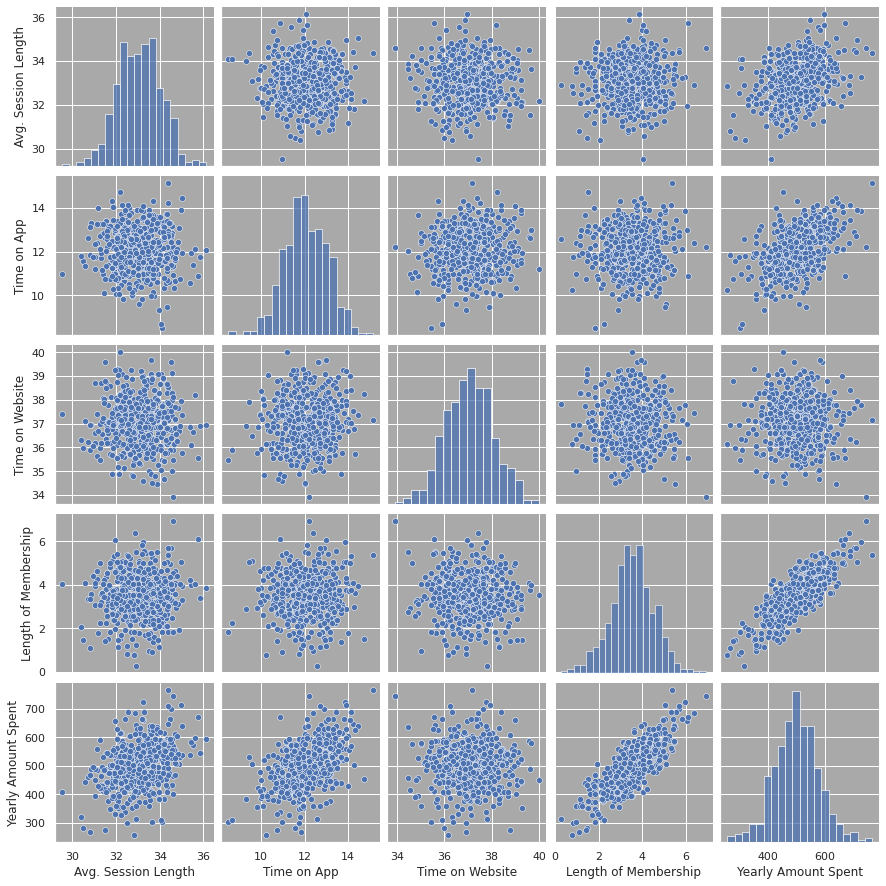

In [11]:
sns.pairplot(df)

Podemos concluir que las variables de antigüedad de la membresía y gasto anual del usuario presentan la correlación más fuerte del dataset. 

##### Antigüedad de membresía vs. Gasto anual del usuario

Text(3.1750000000000043, 0.5, 'Antigüedad de la membresía (usuario)')

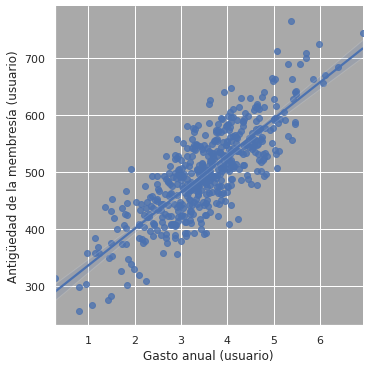

In [40]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)
plt.xlabel('Gasto anual (usuario)')
plt.ylabel('Antigüedad de la membresía (usuario)')

Podemos formalizar la idea de que a más tiempo es miembro un usuario, más gasto anual tendrá. Es una conclusión que tiene sentido. 

### **Regresión Lineal: Utilizando el modelo de SciKit Learn**

#### **Preparación del modelo: Train y Test**

Preparamos los sets de Entrenamiento y Prueba (Train-Test) para implementar los modelos de la librería SciKit Learn.

Preparamos dos variables: 

* y: Contiene los datos de la columna con los gastos anuales de los usuarios.

* X: Contiene el resto de las variables del dataset. 

In [13]:
y = df['Yearly Amount Spent']

In [14]:
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

Importamos el modelo de train y test de SciKit Learn, y pasamos por parámetros nuestras variables. 

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### **Entrenamiento del modelo**

Una vez listo el modelo, podemos entrenarlo en nuesto set de entrenamiento. 


Importamos el modelo de regresión lineal de SciKit Learn.

In [17]:
from sklearn.linear_model import LinearRegression

Creamos una instancia de regresión lineal llamada rl

In [18]:
rl = LinearRegression()

'Entrenamos' a la instancia rl en nuestros datos de entrenamiento. 

In [19]:
rl.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Imprimimos los coeficientes del modelo. 

In [20]:
print('Coeficientes: \n', rl.coef_)

Coeficientes: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


#### **Predicciones del modelo**

Utilizamos el método .predict pasando por parámetro nuestro set de prueba para obtener las predicciones del modelo. Se las asignamos a una variable. 

In [21]:
predicciones = rl.predict(X_test)

La forma más eficiente de evaluar el rendimiento de nuestras predicciones es visualizando, generamos un gráfico de correlación entre test y lo predecido para test. 

Text(0, 0.5, 'Y Predecido')

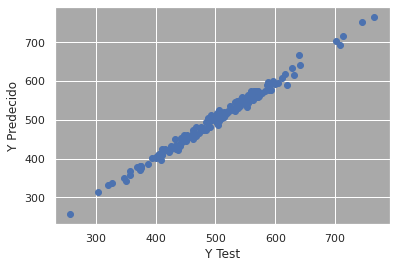

In [22]:
plt.scatter(y_test,predicciones)
plt.xlabel('Y Test')
plt.ylabel('Y Predecido')

El modelo es casi perfecto, considerando que se trata de 4 variables numéricas. 

#### **Evaluación del modelo**

Importamos las métricas del modelo desde sklearn, para MAE, MSE y RMSE

In [32]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predicciones))
print('MSE:', metrics.mean_squared_error(y_test, predicciones))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicciones)))

MAE: 7.228148653430845
MSE: 79.81305165097463
RMSE: 8.933815066978644


Para simplificar la lectura, sklearn nos proporciona un método de explicación. 

In [33]:
metrics.explained_variance_score(y_test, predicciones)

0.9890771231889607

Explicamos el 99% de la varianza, el modelo es muy sólido. 

####**Residuales del modelo**

Visualizamos los residuales del modelo en forma de distribución. Si la misma es normal, entonces el modelo es sólido. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


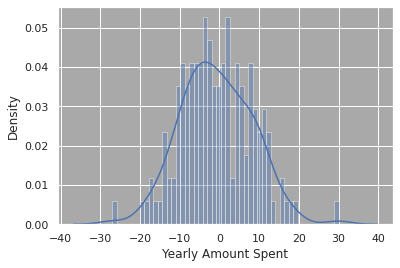

In [34]:
sns.distplot((y_test-predicciones),bins=50);

La distribución parece normal, con lo cual no hay que preocuparse por los residuales. 

### **Conclusiones**

Una vez finalizado nuestro modelo y obtenidos los coeficientes, podemos pasar a interpretarlos para arribar a conclusiones que agreguen valor a los datos. 

In [35]:
coeficientes = pd.DataFrame(rl.coef_,X.columns)
coeficientes.columns = ['Coeficiente']
coeficientes

,Coeficiente
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


A partir de la tabla de coeficientes, podemos decir que, en la medida en que las demás variables se mantengan fijas: 

1. Un incremento de 1(una) unidad en el tiempo promedio de sesión está asociado a un incremento de 25.98 dólares en el gasto del cliente.
2. Un incremento de 1(una) unidad en el tiempo en la app del usuario está asociado a un incremento de 38.59 dólares en el gasto del cliente. 
3. Un incremento de 1(una) unidad en el tiempo en el sitio web del usuario está asociado a un incremento de 0.19 dólares en el gasto del cliente. 
4. Un incremento de 1(una) unidad en la antigüedad de membresía del usuario está asociado a un incremento de 61.27 dólares en el gasto del cliente. 

A partir de estas conclusiones, uno podría argumentar que la principal decisión que habría que tomar sería entre invertir en el sitio web en vistas a que su rendimiento alcance el de la app, o simplemente seguir invirtiendo en la app, que presenta óptimos resultados. 